<a href="https://colab.research.google.com/github/hajri94/research-project/blob/main/Test_Model_Building.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import datetime as dt 
import matplotlib.pyplot as plt
from numpy import percentile


In [ ]:
# We download the excel file
from google.colab import files
uploaded = files.upload()

Saving Test dataframe 10259.xlsx to Test dataframe 10259 (1).xlsx


In [ ]:
# Convert the excel file into pandas Dataframe
import io 
df = pd.read_excel(io.BytesIO(uploaded['Test dataframe 10259.xlsx']))
# We round the columns (POWER , Temperature, Irradiation.flux) to one decimal place.
df['Temperature']=df['Temperature'].round(1)
df['Irradiation.flux']=df['Irradiation.flux'].round(1)





In [ ]:
# We create multiple POWER lagged columns (we choose 12 lagged dependent variables  ) 
lagged1 = pd.concat([df['POWER'].shift(lag).rename('{}_lag{}'.format(df['POWER'].name, lag)) for lag in range(13)], axis=1)
# we convert the integers to float using astype fuction  and drop the the nan values usiing dropna function.
L1=lagged1.dropna().astype(float)





In [ ]:
# We create multiple Temperature lagged columns (we choose 24 lagged independent variables)
lagged2 = pd.concat([df['Temperature'].shift(lag).rename('{}_lag{}'.format(df['Temperature'].name, lag)) for lag in range(25)], axis=1)
# we convert the integers to float using astype fuction  and drop the the nan values usiing dropna function.
L2=lagged2.dropna().astype(float)


In [ ]:
# We create multiple Irradiation.flux lagged columns(we choose 24 lagged independent variables)
lagged3 = pd.concat([df['Irradiation.flux'].shift(lag).rename('{}_lag{}'.format(df['Irradiation.flux'].name, lag)) for lag in range(25)], axis=1)
# we convert the integers to float using astype fuction  and drop the the nan values usiing dropna function.
L3=lagged3.dropna().astype(float)



In [ ]:
# Maximize the size of Column in google colab 
#(we resize the maximum number of columns in google colab to fit our dataframe)
from google.colab.data_table import DataTable
DataTable.max_columns = 300
# Joining the DataFrame of POWER Lagged Columns to the Dataframe of Temperature Lagged Columns 
# We use the concat function to join 2 dataframes lagged1 (POWER) + lagged2 (Temperature) => Creation of new dataframe called "result".
result = pd.concat([L1,L2], axis=1, join='inner')


In [ ]:
#Joining the DataFrame of POWER and Temperature Lagged Columns (POWER+Temperature=> result dataframe) to the Dataframe of Irradiation flux Lagged Columns 
# We use the concat function to join 2 dataframes result (POWER+Temperature) + lagged3 (Irradiation flux)  => Creation of new dataframe called "result1"
result1 = pd.concat([result,L3], axis=1, join='inner')


In [ ]:
# We join the "Result1" Dataframe (Power , Temperature, Irradiation flux ) to the original dataframe (the one that we have uploaded from excel)
# we perform this line of code in order to link the two columns (READ_DATE),(Week_Day) to the datframe (result2). 
# The new dataframe need to be more organized as we see some columns that are repeated. 
result2 = pd.concat([result1,df], axis=1, join='inner')
#we remove the columns titled (POWER , Temperature, Irradiation flux)
dk=result2.drop(['POWER', 'Temperature','Irradiation.flux'], axis = 1) 
# To move the Read_Date and Week Date columns to first Position we implement some initial step: 
# First we remove the targeted column "Week_Day" from its intial position in the dataframe.  
first_column = dk.pop('Week_Day')
# Second we insert the removed column "Week_Day" to first position.
dk.insert(0, 'Week_Day', first_column)
# We perform the previous step for the "READ_DATE" column.
second_column = dk.pop('READ_DATE')
dk.insert(0, 'READ_DATE', second_column)


In [ ]:
# After creating the new dataframe (called dk), we link it to calendar data table  which is put in an excel file to carry out this step :  
# We download the calendar data excel file
from google.colab import files
uploaded = files.upload()

Saving calendar Data .xlsx to calendar Data .xlsx


In [ ]:
# Convert the excel file into Dataframe
import io 
dm = pd.read_excel(io.BytesIO(uploaded['calendar Data .xlsx']))
#In the "Bank Holidays" column we replace the NaN value with zeros.
dm['Bank Holidays'] = dm['Bank Holidays'].fillna(0)
# we remove the "READ_DATE" and "Week_Day" columns to avoid the Repetition of these column when linking it to the dataframe "Dk" 
remove_column = dm.pop('READ_DATE')
remove2_column = dm.pop('Week_Day')


In [ ]:
# we convert the  integers dummy variables (calendar data)  to floats. 
dm[['Tuesday 0h','Tuesday 1h','Tuesday 2h','Tuesday 3h','Tuesday 4h','Tuesday 5h','Tuesday 6h','Tuesday 7h','Tuesday 8h','Tuesday 9h','Tuesday 10h','Tuesday 11h','Tuesday 12h','Tuesday 13h','Tuesday 14h',
        'Tuesday 15h','Tuesday 16h','Tuesday 17h','Tuesday 18h','Tuesday 19h','Tuesday 20h','Tuesday 21h','Tuesday 22h','Tuesday 23h','Wednesday 0h','Wednesday 1h','Wednesday 2h','Wednesday 3h','Wednesday 4h','Wednesday 5h','Wednesday 6h','Wednesday 7h','Wednesday 8h','Wednesday 9h','Wednesday 10h','Wednesday 11h','Wednesday 12h','Wednesday 13h','Wednesday 14h',
        'Wednesday 15h','Wednesday 16h','Wednesday 17h','Wednesday 18h','Wednesday 19h','Wednesday 20h','Wednesday 21h','Wednesday 22h','Wednesday 23h','Thursday 0h','Thursday 1h','Thursday 2h','Thursday 3h','Thursday 4h','Thursday 5h','Thursday 6h','Thursday 7h','Thursday 8h','Thursday 9h','Thursday 10h','Thursday 11h','Thursday 12h','Thursday 13h','Thursday 14h',
        'Thursday 15h','Thursday 16h','Thursday 17h','Thursday 18h','Thursday 19h','Thursday 20h','Thursday 21h','Thursday 22h','Thursday 23h','Friday 0h','Friday 1h','Friday 2h','Friday 3h','Friday 4h','Friday 5h','Friday 6h','Friday 7h','Friday 8h','Friday 9h','Friday 10h','Friday 11h','Friday 12h','Friday 13h','Friday 14h',
        'Friday 15h','Friday 16h','Friday 17h','Friday 18h','Friday 19h','Friday 20h','Friday 21h','Friday 22h','Friday 23h','Saturday 0h','Saturday 1h','Saturday 2h','Saturday 3h','Saturday 4h','Saturday 5h','Saturday 6h','Saturday 7h','Saturday 8h','Saturday 9h','Saturday 10h','Saturday 11h','Saturday 12h','Saturday 13h','Saturday 14h',
        'Saturday 15h','Saturday 16h','Saturday 17h','Saturday 18h','Saturday 19h','Saturday 20h','Saturday 21h','Saturday 22h','Saturday 23h','Sunday 0h','Sunday 1h','Sunday 2h','Sunday 3h','Sunday 4h','Sunday 5h','Sunday 6h','Sunday 7h','Sunday 8h','Sunday 9h','Sunday 10h','Sunday 11h','Sunday 12h','Sunday 13h','Sunday 14h',
        'Sunday 15h','Sunday 16h','Sunday 17h','Sunday 18h','Sunday 19h','Sunday 20h','Sunday 21h','Sunday 22h','Sunday 23h','Monday 0h','Monday 1h','Monday 2h','Monday 3h','Monday 4h','Monday 5h','Monday 6h','Monday 7h','Monday 8h','Monday 9h','Monday 10h','Monday 11h','Monday 12h','Monday 13h','Monday 14h',
        'Monday 15h','Monday 16h','Monday 17h','Monday 18h','Monday 19h','Monday 20h','Monday 21h','Monday 22h','Monday 23h']]= dm[['Tuesday 0h','Tuesday 1h','Tuesday 2h','Tuesday 3h','Tuesday 4h','Tuesday 5h','Tuesday 6h','Tuesday 7h','Tuesday 8h','Tuesday 9h','Tuesday 10h','Tuesday 11h','Tuesday 12h','Tuesday 13h','Tuesday 14h',
        'Tuesday 15h','Tuesday 16h','Tuesday 17h','Tuesday 18h','Tuesday 19h','Tuesday 20h','Tuesday 21h','Tuesday 22h','Tuesday 23h','Wednesday 0h','Wednesday 1h','Wednesday 2h','Wednesday 3h','Wednesday 4h','Wednesday 5h','Wednesday 6h','Wednesday 7h','Wednesday 8h','Wednesday 9h','Wednesday 10h','Wednesday 11h','Wednesday 12h','Wednesday 13h','Wednesday 14h',
        'Wednesday 15h','Wednesday 16h','Wednesday 17h','Wednesday 18h','Wednesday 19h','Wednesday 20h','Wednesday 21h','Wednesday 22h','Wednesday 23h','Thursday 0h','Thursday 1h','Thursday 2h','Thursday 3h','Thursday 4h','Thursday 5h','Thursday 6h','Thursday 7h','Thursday 8h','Thursday 9h','Thursday 10h','Thursday 11h','Thursday 12h','Thursday 13h','Thursday 14h',
        'Thursday 15h','Thursday 16h','Thursday 17h','Thursday 18h','Thursday 19h','Thursday 20h','Thursday 21h','Thursday 22h','Thursday 23h','Friday 0h','Friday 1h','Friday 2h','Friday 3h','Friday 4h','Friday 5h','Friday 6h','Friday 7h','Friday 8h','Friday 9h','Friday 10h','Friday 11h','Friday 12h','Friday 13h','Friday 14h',
        'Friday 15h','Friday 16h','Friday 17h','Friday 18h','Friday 19h','Friday 20h','Friday 21h','Friday 22h','Friday 23h','Saturday 0h','Saturday 1h','Saturday 2h','Saturday 3h','Saturday 4h','Saturday 5h','Saturday 6h','Saturday 7h','Saturday 8h','Saturday 9h','Saturday 10h','Saturday 11h','Saturday 12h','Saturday 13h','Saturday 14h',
        'Saturday 15h','Saturday 16h','Saturday 17h','Saturday 18h','Saturday 19h','Saturday 20h','Saturday 21h','Saturday 22h','Saturday 23h','Sunday 0h','Sunday 1h','Sunday 2h','Sunday 3h','Sunday 4h','Sunday 5h','Sunday 6h','Sunday 7h','Sunday 8h','Sunday 9h','Sunday 10h','Sunday 11h','Sunday 12h','Sunday 13h','Sunday 14h',
        'Sunday 15h','Sunday 16h','Sunday 17h','Sunday 18h','Sunday 19h','Sunday 20h','Sunday 21h','Sunday 22h','Sunday 23h','Monday 0h','Monday 1h','Monday 2h','Monday 3h','Monday 4h','Monday 5h','Monday 6h','Monday 7h','Monday 8h','Monday 9h','Monday 10h','Monday 11h','Monday 12h','Monday 13h','Monday 14h',
        'Monday 15h','Monday 16h','Monday 17h','Monday 18h','Monday 19h','Monday 20h','Monday 21h','Monday 22h','Monday 23h']].apply(pd.to_numeric,downcast='float')


dm.dtypes


Hour_day           int64
Tuesday 0h       float32
Tuesday 1h       float32
Tuesday 2h       float32
Tuesday 3h       float32
                  ...   
Monday 20h       float32
Monday 21h       float32
Monday 22h       float32
Monday 23h       float32
Bank Holidays    float64
Length: 170, dtype: object

In [ ]:
# we join the calendar data dataframe uploaded from excel file to the dataframe "Dk" 
result3 = pd.concat([dk,dm], axis=1, join='inner')



In [ ]:
#we move the postion of  "Hour_day" column to first position. 
column1 = result3.pop('Hour_day')
result3.insert(0, 'Hour_day', column1)
# We drop the nan value from the dataframe
r3=result3.dropna()
# we extract the month date from the READ_DATE column and add it as new column (because we will need it later for modelling purpose)
r3['month'] = pd.DatetimeIndex(r3['READ_DATE']).month
#we move the postion of  "month" column to first position. 
column2 = r3.pop('month')
r3.insert(0, 'month', column2)
#We move the read_date column to first position 
column3 = r3.pop('READ_DATE')
r3.insert(0, 'READ_DATE', column3)











In [ ]:
# With this code we can perform the filtering of each of the "Hour_day" value.  
HourWeek=r3[r3['Hour_day']== 1]



In [ ]:
# after building the first part of the model called ARX model (Autoregressive with exogenous modelling), we perform the model fitting process.
#We begin with:  
#Separation of indeppendent variables and dependent variables

import pandas as pd
import statsmodels.api as sm
X = r3[['POWER_lag1','POWER_lag2','POWER_lag3','POWER_lag4','POWER_lag5','POWER_lag6','POWER_lag7','POWER_lag8','POWER_lag9','POWER_lag10','POWER_lag11','POWER_lag12',
        'Temperature_lag0','Temperature_lag1','Temperature_lag2','Temperature_lag3','Temperature_lag4','Temperature_lag5','Temperature_lag6','Temperature_lag7','Temperature_lag8',
        'Temperature_lag9','Temperature_lag10','Temperature_lag11','Temperature_lag12','Temperature_lag13','Temperature_lag14','Temperature_lag15','Temperature_lag16','Temperature_lag17','Temperature_lag18','Temperature_lag19','Temperature_lag20','Temperature_lag21','Temperature_lag22','Temperature_lag23','Temperature_lag24',
        'Irradiation.flux_lag0','Irradiation.flux_lag1','Irradiation.flux_lag2','Irradiation.flux_lag3','Irradiation.flux_lag4','Irradiation.flux_lag5','Irradiation.flux_lag6','Irradiation.flux_lag7','Irradiation.flux_lag8','Irradiation.flux_lag9','Irradiation.flux_lag10','Irradiation.flux_lag11','Irradiation.flux_lag12','Irradiation.flux_lag13','Irradiation.flux_lag14','Irradiation.flux_lag15','Irradiation.flux_lag16','Irradiation.flux_lag17','Irradiation.flux_lag18','Irradiation.flux_lag19','Irradiation.flux_lag20','Irradiation.flux_lag21','Irradiation.flux_lag22','Irradiation.flux_lag23',
        'Irradiation.flux_lag24','Tuesday 0h','Tuesday 1h','Tuesday 2h','Tuesday 3h','Tuesday 4h','Tuesday 5h','Tuesday 6h','Tuesday 7h','Tuesday 8h','Tuesday 9h','Tuesday 10h','Tuesday 11h','Tuesday 12h','Tuesday 13h','Tuesday 14h',
        'Tuesday 15h','Tuesday 16h','Tuesday 17h','Tuesday 18h','Tuesday 19h','Tuesday 20h','Tuesday 21h','Tuesday 22h','Tuesday 23h','Wednesday 0h','Wednesday 1h','Wednesday 2h','Wednesday 3h','Wednesday 4h','Wednesday 5h','Wednesday 6h','Wednesday 7h','Wednesday 8h','Wednesday 9h','Wednesday 10h','Wednesday 11h','Wednesday 12h','Wednesday 13h','Wednesday 14h',
        'Wednesday 15h','Wednesday 16h','Wednesday 17h','Wednesday 18h','Wednesday 19h','Wednesday 20h','Wednesday 21h','Wednesday 22h','Wednesday 23h','Thursday 0h','Thursday 1h','Thursday 2h','Thursday 3h','Thursday 4h','Thursday 5h','Thursday 6h','Thursday 7h','Thursday 8h','Thursday 9h','Thursday 10h','Thursday 11h','Thursday 12h','Thursday 13h','Thursday 14h',
        'Thursday 15h','Thursday 16h','Thursday 17h','Thursday 18h','Thursday 19h','Thursday 20h','Thursday 21h','Thursday 22h','Thursday 23h','Friday 0h','Friday 1h','Friday 2h','Friday 3h','Friday 4h','Friday 5h','Friday 6h','Friday 7h','Friday 8h','Friday 9h','Friday 10h','Friday 11h','Friday 12h','Friday 13h','Friday 14h',
        'Friday 15h','Friday 16h','Friday 17h','Friday 18h','Friday 19h','Friday 20h','Friday 21h','Friday 22h','Friday 23h','Saturday 0h','Saturday 1h','Saturday 2h','Saturday 3h','Saturday 4h','Saturday 5h','Saturday 6h','Saturday 7h','Saturday 8h','Saturday 9h','Saturday 10h','Saturday 11h','Saturday 12h','Saturday 13h','Saturday 14h',
        'Saturday 15h','Saturday 16h','Saturday 17h','Saturday 18h','Saturday 19h','Saturday 20h','Saturday 21h','Saturday 22h','Saturday 23h','Sunday 0h','Sunday 1h','Sunday 2h','Sunday 3h','Sunday 4h','Sunday 5h','Sunday 6h','Sunday 7h','Sunday 8h','Sunday 9h','Sunday 10h','Sunday 11h','Sunday 12h','Sunday 13h','Sunday 14h',
        'Sunday 15h','Sunday 16h','Sunday 17h','Sunday 18h','Sunday 19h','Sunday 20h','Sunday 21h','Sunday 22h','Sunday 23h','Monday 0h','Monday 1h','Monday 2h','Monday 3h','Monday 4h','Monday 5h','Monday 6h','Monday 7h','Monday 8h','Monday 9h','Monday 10h','Monday 11h','Monday 12h','Monday 13h','Monday 14h',
        'Monday 15h','Monday 16h','Monday 17h','Monday 18h','Monday 19h','Monday 20h','Monday 21h','Monday 22h','Monday 23h','Bank Holidays']] 
Y = r3['POWER_lag0']



In [ ]:
# we fit our model using statmodels library 
import pandas as pd
import statsmodels.api as sm
from sklearn import linear_model
import statsmodels.formula.api as smf
regr = linear_model.LinearRegression()
regr.fit(X, Y)


LinearRegression()

In [ ]:
# with statsmodels we display a comprehensive table with statistical informations.
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
print_model = model.summary()
print(print_model)


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


                            OLS Regression Results                            
Dep. Variable:             POWER_lag0   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     570.4
Date:                Fri, 03 Jun 2022   Prob (F-statistic):               0.00
Time:                        09:51:43   Log-Likelihood:                -17818.
No. Observations:                8404   AIC:                         3.610e+04
Df Residuals:                    8173   BIC:                         3.772e+04
Df Model:                         230                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      3

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
F=r3.rename(columns={'Tuesday 0h':'Tuesday_0h','Tuesday 1h':'Tuesday_1h','Tuesday 2h':'Tuesday_2h','Tuesday 3h':'Tuesday_3h','Tuesday 4h':'Tuesday_4h','Tuesday 5h':'Tuesday_5h','Tuesday 6h':'Tuesday_6h','Tuesday 7h':'Tuesday_7h','Tuesday 8h':'Tuesday_8h','Tuesday 9h':'Tuesday_9h','Tuesday 10h':'Tuesday_10h','Tuesday 11h':'Tuesday_11h','Tuesday 12h':'Tuesday_12h','Tuesday 13h':'Tuesday_13h','Tuesday 14h':'Tuesday_14h',
'Tuesday 15h':'Tuesday_15h','Tuesday 16h':'Tuesday_16h','Tuesday 17h':'Tuesday_17h','Tuesday 18h':'Tuesday_18h','Tuesday 19h':'Tuesday_19h','Tuesday 20h':'Tuesday_20h','Tuesday 21h':'Tuesday_21h','Tuesday 22h':'Tuesday_22h','Tuesday 23h':'Tuesday_23h','Wednesday 0h':'Wednesday_0h','Wednesday 1h':'Wednesday_1h','Wednesday 2h':'Wednesday_2h','Wednesday 3h':'Wednesday_3h','Wednesday 4h':'Wednesday_4h','Wednesday 5h':'Wednesday_5h','Wednesday 6h':'Wednesday_6h','Wednesday 7h':'Wednesday_7h','Wednesday 8h':'Wednesday_8h','Wednesday 9h':'Wednesday_9h','Wednesday 10h':'Wednesday_10h','Wednesday 11h':'Wednesday_11h','Wednesday 12h':'Wednesday_12h','Wednesday 13h':'Wednesday_13h','Wednesday 14h':'Wednesday_14h',
'Wednesday 15h':'Wednesday_15h','Wednesday 16h':'Wednesday_16h','Wednesday 17h':'Wednesday_17h','Wednesday 18h':'Wednesday_18h','Wednesday 19h':'Wednesday_19h','Wednesday 20h':'Wednesday_20h','Wednesday 21h':'Wednesday_21h','Wednesday 22h':'Wednesday_22h','Wednesday 23h':'Wednesday_23h','Thursday 0h':'Thursday_0h','Thursday 1h':'Thursday_1h','Thursday 2h':'Thursday_2h','Thursday 3h':'Thursday_3h','Thursday 4h':'Thursday_4h','Thursday 5h':'Thursday_5h','Thursday 6h':'Thursday_6h','Thursday 7h':'Thursday_7h','Thursday 8h':'Thursday_8h','Thursday 9h':'Thursday_9h','Thursday 10h':'Thursday_10h','Thursday 11h':'Thursday_11h','Thursday 12h':'Thursday_12h','Thursday 13h':'Thursday_13h','Thursday 14h':'Thursday_14h',
'Thursday 15h':'Thursday_15h','Thursday 16h':'Thursday_16h','Thursday 17h':'Thursday_17h','Thursday 18h':'Thursday_18h','Thursday 19h':'Thursday_19h','Thursday 20h':'Thursday_20h','Thursday 21h':'Thursday_21h','Thursday 22h':'Thursday_22h','Thursday 23h':'Thursday_23h','Friday 0h':'Friday_0h','Friday 1h':'Friday_1h','Friday 2h':'Friday_2h','Friday 3h':'Friday_3h','Friday 4h':'Friday_4h','Friday 5h':'Friday_5h','Friday 6h':'Friday_6h','Friday 7h':'Friday_7h','Friday 8h':'Friday_8h','Friday 9h':'Friday_9h','Friday 10h':'Friday_10h','Friday 11h':'Friday_11h','Friday 12h':'Friday_12h','Friday 13h':'Friday_13h','Friday 14h':'Friday_14h',
'Friday 15h':'Friday_15h','Friday 16h':'Friday_16h','Friday 17h':'Friday_17h','Friday 18h':'Friday_18h','Friday 19h':'Friday_19h','Friday 20h':'Friday_20h','Friday 21h':'Friday_21h','Friday 22h':'Friday_22h','Friday 23h':'Friday_23h','Saturday 0h':'Saturday_0h','Saturday 1h':'Saturday_1h','Saturday 2h':'Saturday_2h','Saturday 3h':'Saturday_3h','Saturday 4h':'Saturday_4h','Saturday 5h':'Saturday_5h','Saturday 6h':'Saturday_6h','Saturday 7h':'Saturday_7h','Saturday 8h':'Saturday_8h','Saturday 9h':'Saturday_9h','Saturday 10h':'Saturday_10h','Saturday 11h':'Saturday_11h','Saturday 12h':'Saturday_12h','Saturday 13h':'Saturday_13h','Saturday 14h':'Saturday_14h',
'Saturday 15h':'Saturday_15h','Saturday 16h':'Saturday_16h','Saturday 17h':'Saturday_17h','Saturday 18h':'Saturday_18h','Saturday 19h':'Saturday_19h','Saturday 20h':'Saturday_20h','Saturday 21h':'Saturday_21h','Saturday 22h':'Saturday_22h','Saturday 23h':'Saturday_23h','Sunday 0h':'Sunday_0h','Sunday 1h':'Sunday_1h','Sunday 2h':'Sunday_2h','Sunday 3h':'Sunday_3h','Sunday 4h':'Sunday_4h','Sunday 5h':'Sunday_5h','Sunday 6h':'Sunday_6h','Sunday 7h':'Sunday_7h','Sunday 8h':'Sunday_8h','Sunday 9h':'Sunday_9h','Sunday 10h':'Sunday_10h','Sunday 11h':'Sunday_11h','Sunday 12h':'Sunday_12h','Sunday 13h':'Sunday_13h','Sunday 14h':'Sunday_14h',
'Sunday 15h':'Sunday_15h','Sunday 16h':'Sunday_16h','Sunday 17h':'Sunday_17h','Sunday 18h':'Sunday_18h','Sunday 19h':'Sunday_19h','Sunday 20h':'Sunday_20h','Sunday 21h':'Sunday_21h','Sunday 22h':'Sunday_22h','Sunday 23h':'Sunday_23h','Monday 0h':'Monday_0h','Monday 1h':'Monday_1h','Monday 2h':'Monday_2h','Monday 3h':'Monday_3h','Monday 4h':'Monday_4h','Monday 5h':'Monday_5h','Monday 6h':'Monday_6h','Monday 7h':'Monday_7h','Monday 8h':'Monday_8h','Monday 9h':'Monday_9h','Monday 10h':'Monday_10h','Monday 11h':'Monday_11h','Monday 12h':'Monday_12h','Monday 13h':'Monday_13h','Monday 14h':'Monday_14h',
'Monday 15h':'Monday_15h','Monday 16h':'Monday_16h','Monday 17h':'Monday_17h','Monday 18h':'Monday_18h','Monday 19h':'Monday_19h','Monday 20h':'Monday_20h','Monday 21h':'Monday_21h','Monday 22h':'Monday_22h','Monday 23h':'Monday_23h','Irradiation.flux_lag0':'Irradiation_flux_lag0','Irradiation.flux_lag1':'Irradiation_flux_lag1','Irradiation.flux_lag2':'Irradiation_flux_lag2','Irradiation.flux_lag3':'Irradiation_flux_lag3','Irradiation.flux_lag4':'Irradiation_flux_lag4','Irradiation.flux_lag5':'Irradiation_flux_lag5','Irradiation.flux_lag6':'Irradiation_flux_lag6','Irradiation.flux_lag7':'Irradiation_flux_lag7','Irradiation.flux_lag8':'Irradiation_flux_lag8','Irradiation.flux_lag9':'Irradiation_flux_lag9','Irradiation.flux_lag10':'Irradiation_flux_lag10',
'Irradiation.flux_lag11':'Irradiation_flux_lag11','Irradiation.flux_lag12':'Irradiation_flux_lag12','Irradiation.flux_lag13':'Irradiation_flux_lag13','Irradiation.flux_lag14':'Irradiation_flux_lag14','Irradiation.flux_lag15':'Irradiation_flux_lag15','Irradiation.flux_lag16':'Irradiation_flux_lag16','Irradiation.flux_lag17':'Irradiation_flux_lag17','Irradiation.flux_lag18':'Irradiation_flux_lag18','Irradiation.flux_lag19':'Irradiation_flux_lag19','Irradiation.flux_lag20':'Irradiation_flux_lag20','Irradiation.flux_lag21':'Irradiation_flux_lag21','Irradiation.flux_lag22':'Irradiation_flux_lag22','Irradiation.flux_lag23':'Irradiation_flux_lag23','Irradiation.flux_lag24':'Irradiation_flux_lag24','Bank Holidays':'Bank_Holidays'})

KJB = smf.ols('POWER_lag0 ~ POWER_lag1 + POWER_lag2 + POWER_lag3 + POWER_lag4 + POWER_lag5 + POWER_lag6 + POWER_lag7 + POWER_lag8 + POWER_lag9 + POWER_lag10 + POWER_lag11 + POWER_lag12 + Temperature_lag0 + Temperature_lag1 + Temperature_lag2 + Temperature_lag3 + Temperature_lag4 + Temperature_lag5 + Temperature_lag6 + Temperature_lag7 + Temperature_lag8 + Temperature_lag9 + Temperature_lag10 + Temperature_lag11 + Temperature_lag12 + Temperature_lag13 + Temperature_lag14 + Temperature_lag15 + Temperature_lag16 + Temperature_lag17 + Temperature_lag18 + Temperature_lag19 + Temperature_lag20 + Temperature_lag21 + Temperature_lag22 + Temperature_lag23 + Temperature_lag24 + Irradiation_flux_lag0 + Irradiation_flux_lag1 + Irradiation_flux_lag2 + Irradiation_flux_lag3 + Irradiation_flux_lag4 + Irradiation_flux_lag5 + Irradiation_flux_lag6 + Irradiation_flux_lag7 + Irradiation_flux_lag8 + Irradiation_flux_lag9 + Irradiation_flux_lag10 + Irradiation_flux_lag11 + Irradiation_flux_lag12 + Irradiation_flux_lag13 + Irradiation_flux_lag14 + Irradiation_flux_lag15 + Irradiation_flux_lag16 + Irradiation_flux_lag17 + Irradiation_flux_lag18 + Irradiation_flux_lag19 + Irradiation_flux_lag20 + Irradiation_flux_lag21 + Irradiation_flux_lag22 + Irradiation_flux_lag23 + Irradiation_flux_lag24 + Tuesday_0h + Tuesday_1h + Tuesday_2h + Tuesday_3h + Tuesday_4h + Tuesday_5h + Tuesday_6h + Tuesday_7h + Tuesday_8h + Tuesday_9h + Tuesday_10h + Tuesday_11h + Tuesday_12h + Tuesday_13h + Tuesday_14h + Tuesday_15h + Tuesday_16h + Tuesday_17h + Tuesday_18h + Tuesday_19h + Tuesday_20h + Tuesday_21h + Tuesday_22h + Tuesday_23h + Wednesday_0h + Wednesday_1h + Wednesday_2h + Wednesday_3h + Wednesday_4h + Wednesday_5h + Wednesday_6h + Wednesday_7h + Wednesday_8h + Wednesday_9h + Wednesday_10h + Wednesday_11h + Wednesday_12h + Wednesday_13h + Wednesday_14h + Wednesday_15h + Wednesday_16h + Wednesday_17h + Wednesday_18h + Wednesday_19h + Wednesday_20h + Wednesday_21h + Wednesday_22h + Wednesday_23h + Thursday_0h + Thursday_1h + Thursday_2h + Thursday_3h + Thursday_4h + Thursday_5h + Thursday_6h + Thursday_7h + Thursday_8h + Thursday_9h + Thursday_10h + Thursday_11h + Thursday_12h + Thursday_13h + Thursday_14h + Thursday_15h + Thursday_16h + Thursday_17h + Thursday_18h + Thursday_19h + Thursday_20h + Thursday_21h + Thursday_22h + Thursday_23h + Friday_0h + Friday_1h + Friday_2h + Friday_3h + Friday_4h + Friday_5h + Friday_6h + Friday_7h + Friday_8h + Friday_9h + Friday_10h + Friday_11h + Friday_12h + Friday_13h + Friday_14h + Friday_15h + Friday_16h + Friday_17h + Friday_18h + Friday_19h + Friday_20h + Friday_21h + Friday_22h + Friday_23h + Saturday_0h + Saturday_1h + Saturday_2h + Saturday_3h + Saturday_4h + Saturday_5h + Saturday_6h + Saturday_7h + Saturday_8h + Saturday_9h + Saturday_10h + Saturday_11h + Saturday_12h + Saturday_13h + Saturday_14h + Saturday_15h + Saturday_16h + Saturday_17h + Saturday_18h + Saturday_19h + Saturday_20h + Saturday_21h + Saturday_22h + Saturday_23h + Sunday_0h + Sunday_1h + Sunday_2h + Sunday_3h + Sunday_4h + Sunday_5h + Sunday_6h + Sunday_7h + Sunday_8h + Sunday_9h + Sunday_10h + Sunday_11h + Sunday_12h + Sunday_13h + Sunday_14h + Sunday_15h + Sunday_16h + Sunday_17h + Sunday_18h + Sunday_19h + Sunday_20h + Sunday_21h + Sunday_22h + Sunday_23h + Monday_0h + Monday_1h + Monday_2h + Monday_3h + Monday_4h + Monday_5h + Monday_6h + Monday_7h + Monday_8h + Monday_9h + Monday_10h + Monday_11h + Monday_12h + Monday_13h + Monday_14h + Monday_15h + Monday_16h + Monday_17h + Monday_18h + Monday_19h + Monday_20h + Monday_21h + Monday_22h + Monday_23h + Bank_Holidays',F).fit()
F['yhat'] = KJB.fittedvalues
F['resid'] = KJB.resid
F['predicted'] = KJB.predict(F)
F.loc[:,'predicted'] =  KJB.predict(F)





In [ ]:
# We add one column with cumulative sum of the predicted value (our model )and another column for the dataset . 
F['CUMSUM_predicted'] = F['predicted'].cumsum()
F['CUMSUM_POWER_lag0'] = F['POWER_lag0'].cumsum()
# We add another column with cumlative sum for the residual value 
F['CUMSUM_resid'] = F['resid'].cumsum()
F


,READ_DATE,month,Hour_day,Week_Day,POWER_lag0,POWER_lag1,POWER_lag2,POWER_lag3,POWER_lag4,POWER_lag5,...,Monday_21h,Monday_22h,Monday_23h,Bank_Holidays,yhat,resid,predicted,CUMSUM_predicted,CUMSUM_POWER_lag0,CUMSUM_resid
24,2019-01-02 00:00:00,1,0,WED,17.70,16.3,17.8,20.5,18.9,17.0,...,0.0,0.0,0.0,0.0,17.447072,0.252928,17.447072,17.447072,17.70,2.529278e-01
25,2019-01-02 01:00:00,1,1,WED,16.50,17.7,16.3,17.8,20.5,18.9,...,0.0,0.0,0.0,0.0,16.973560,-0.473560,16.973560,34.420632,34.20,-2.206322e-01
26,2019-01-02 02:00:00,1,2,WED,16.80,16.5,17.7,16.3,17.8,20.5,...,0.0,0.0,0.0,0.0,16.398483,0.401517,16.398483,50.819115,51.00,1.808850e-01
27,2019-01-02 03:00:00,1,3,WED,17.00,16.8,16.5,17.7,16.3,17.8,...,0.0,0.0,0.0,0.0,16.783734,0.216266,16.783734,67.602849,68.00,3.971510e-01
28,2019-01-02 04:00:00,1,4,WED,17.24,17.0,16.8,16.5,17.7,16.3,...,0.0,0.0,0.0,0.0,17.318694,-0.078694,17.318694,84.921543,85.24,3.184568e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2019-12-31 19:00:00,12,19,TUE,18.10,18.7,21.3,19.6,16.6,17.7,...,0.0,0.0,0.0,0.0,19.349369,-1.249369,19.349369,101877.265680,101875.66,-1.605680e+00
8756,2019-12-31 20:00:00,12,20,TUE,17.90,18.1,18.7,21.3,19.6,16.6,...,0.0,0.0,0.0,0.0,19.660771,-1.760771,19.660771,101896.926451,101893.56,-3.366451e+00
8757,2019-12-31 21:00:00,12,21,TUE,22.40,17.9,18.1,18.7,21.3,19.6,...,0.0,0.0,0.0,0.0,19.539296,2.860704,19.539296,101916.465747,101915.96,-5.057472e-01
8758,2019-12-31 22:00:00,12,22,TUE,17.50,22.4,17.9,18.1,18.7,21.3,...,0.0,0.0,0.0,0.0,20.160257,-2.660257,20.160257,101936.626005,101933.46,-3.166005e+00


In [ ]:
#We evaluate the regression model using the mean absolute error metric 
#We import the mean_absolute_error from the module sklearn.metrics of sklearn library.
from sklearn.metrics import mean_absolute_error as mae
# we calculate  mean absolute error (MAE) 
error = mae(F['POWER_lag0'], F['predicted'])
# We print the value 
print("Mean absolute error : " + str(error))

Mean absolute error : 1.499909296194327


In [ ]:
# We evaluate the regression model for the winter season months.
# We extract the winter season months from the trained model in order to calculate the R squared value and the mean absolute error (MAE)
F_Winter=F[(F['month']== 11)|(F['month']== 12) |(F['month']== 1)|(F['month']== 2)|(F['month']== 3)]        
# we calculate  mean absolute error (MAE) 
from sklearn.metrics import mean_absolute_error as mae
error = mae(F_Winter['POWER_lag0'], F_Winter['predicted'])
# We print the value 
print("Mean absolute error : " + str(error))
# in order to calculate the R squared we import the r2_score from the module sklearn.metrics of sklearn library.
from sklearn.metrics import r2_score
r2 = r2_score(F_Winter['POWER_lag0'], F_Winter['predicted'])
# We print the value
print('r2 score  is', r2)


Mean absolute error : 1.5589686470157722
r2 score  is 0.8361841373951133


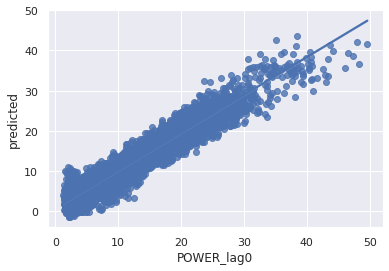

In [ ]:
# Model quality plot (Q-Q plot) X : dataset , Y : Predictive data
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(color_codes=True)
sns.regplot(x="POWER_lag0", y="predicted", data=F)

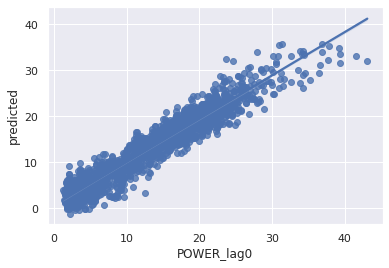

In [ ]:
# Weekend plot (Q-Q plot) X : dataset , Y : Predictive data
Weekend= F[(F["Week_Day"]== "SAT")| (F["Week_Day"]== "SUN")]
sns.set_theme(color_codes=True)
sns.regplot(x="POWER_lag0", y="predicted", data=Weekend)

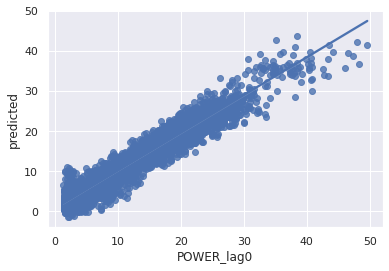

In [ ]:
# Weekday plot (Q-Q plot) X : dataset , Y : Predictive data
Weekday= F[(F["Week_Day"]== "MON")| (F["Week_Day"]== "TUE")|(F["Week_Day"]== "WED")|(F["Week_Day"]== "THU")|(F["Week_Day"]== "FRI")]
sns.set_theme(color_codes=True)
sns.regplot(x="POWER_lag0", y="predicted", data=Weekday)

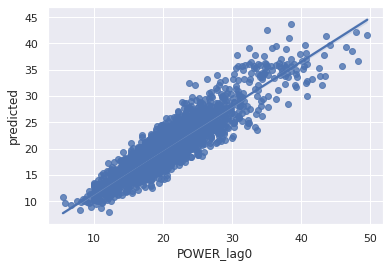

In [ ]:
# Monthly plot (NOV to March) (Q-Q plot) X : dataset , Y : Predictive data: 
NOVtoMARCH = F[(F["month"]== 1)| (F["month"]== 2)|(F["month"]== 3)|(F["month"]== 11)|(F["month"]== 12)]
sns.set_theme(color_codes=True)
sns.regplot(x="POWER_lag0", y="predicted", data= NOVtoMARCH)

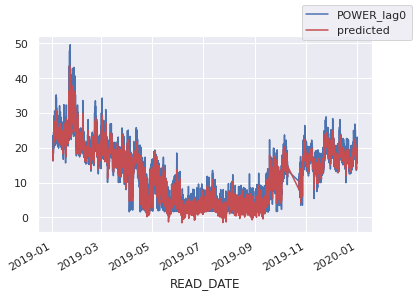

In [ ]:
 # line chart  for the full year  T : month , Y  dataset  and predicted data
import matplotlib.pyplot as plt
ax = F.plot(x="READ_DATE", y="POWER_lag0", legend=False)
F.plot(x="READ_DATE", y="predicted", ax=ax, legend=False, color="r")
ax.figure.legend()
plt.show()







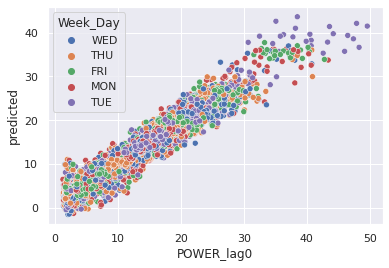

In [ ]:
#(Q-Q plot) for the weekday    T :Dataset   , Y : predicted  
Weekday= F[(F["Week_Day"]== "MON")| (F["Week_Day"]== "TUE")|(F["Week_Day"]== "WED")|(F["Week_Day"]== "THU")|(F["Week_Day"]== "FRI")]
sns.scatterplot(data=Weekday, x="POWER_lag0", y="predicted", hue="Week_Day", palette="deep")


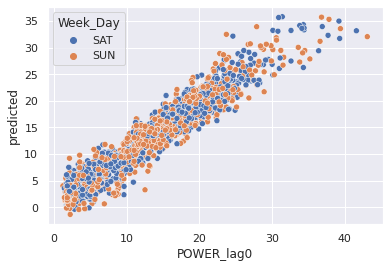

In [ ]:
#(Q-Q plot) for the weekend    T :Dataset   , Y : predicted  
Weekend= F[(F["Week_Day"]== "SAT")| (F["Week_Day"]== "SUN")]
sns.scatterplot(data=Weekend, x="POWER_lag0", y="predicted", hue="Week_Day", palette="deep")

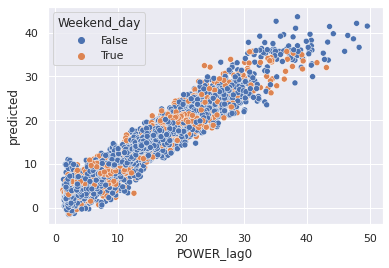

In [ ]:
# We add a column called DayOfWeek in which it contain days of the week extracted from the READ_DATE column ( the values are numerical 0 : monday ... 6 :sunday ) 
F["DayOfWeek"] = F["READ_DATE"].dt.weekday
# A boolean condition is used in order to create the Weekend_day column . 
F["Weekend_day"] = F["DayOfWeek"] >= 5
#(Q-Q plot) for the weekend and weekday    T :Dataset   , Y : predicted   
sns.scatterplot(data=F, x="POWER_lag0", y="predicted", hue="Weekend_day", palette="deep")

In [ ]:
#(Q-Q plot) for the morning hours VS afternoon hours VS night hours from     T :Dataset   , Y : predicted 





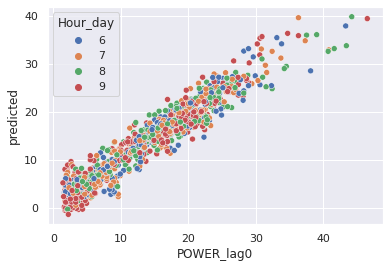

In [ ]:
#(Q-Q plot) for the morning hours from     T :Dataset   , Y : predicted 
Morning_hours= F[(F["Hour_day"]== 6)| (F["Hour_day"]== 7)|(F["Hour_day"]== 8)|(F["Hour_day"]== 9)]
sns.scatterplot(data=Morning_hours, x="POWER_lag0", y="predicted", hue="Hour_day", palette="deep")





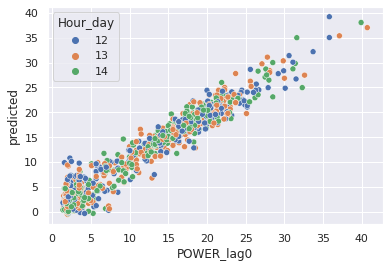

In [ ]:
#(Q-Q plot) for the afternoon hours from     T :Dataset   , Y : predicted 
afternoon_hours= F[(F["Hour_day"]== 12)| (F["Hour_day"]== 13)|(F["Hour_day"]== 14)]
sns.scatterplot(data=afternoon_hours, x="POWER_lag0", y="predicted", hue="Hour_day", palette="deep")

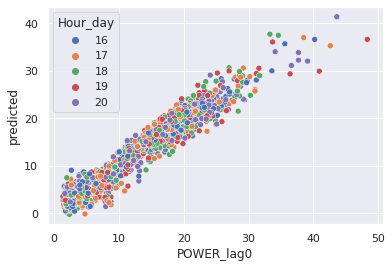

In [ ]:
#(Q-Q plot) for the night hours from     T :Dataset   , Y : predicted 
night_hours= F[(F["Hour_day"]== 16)| (F["Hour_day"]== 17)|(F["Hour_day"]== 18)|(F["Hour_day"]== 19)|(F["Hour_day"]== 20)]
sns.scatterplot(data=night_hours, x="POWER_lag0", y="predicted", hue="Hour_day", palette="deep")

(-20.0, 20.0)

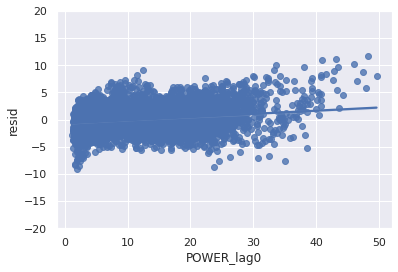

In [ ]:
# Residual and Q plot(dataset) 
sns.set_theme(color_codes=True)
sns.regplot(x="POWER_lag0", y="resid", data=F)
plt.ylim(-20, 20)

(-20.0, 20.0)

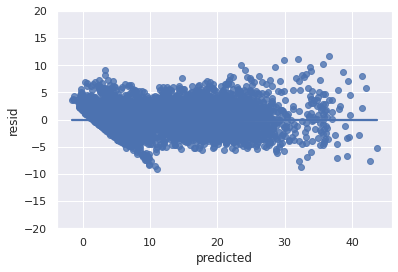

In [ ]:
# Residual and Q plot(predicted power) 
sns.set_theme(color_codes=True)
sns.regplot(x="predicted", y="resid", data=F)
plt.ylim(-20, 20)

(-20.0, 20.0)

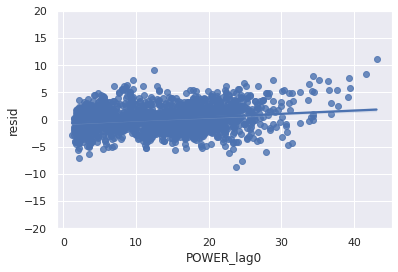

In [ ]:
 # Residual and Q(dataset) plot for weekend 
Weekend= F[(F["Week_Day"]== "SAT")| (F["Week_Day"]== "SUN")]
sns.set_theme(color_codes=True)
sns.regplot(x="POWER_lag0", y="resid", data=Weekend)
plt.ylim(-20, 20)

(-20.0, 20.0)

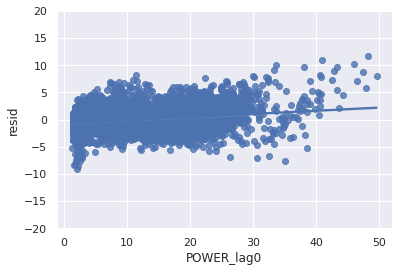

In [ ]:
# Residual and Q(power)plot for weekday
Weekday= F[(F["Week_Day"]== "MON")| (F["Week_Day"]== "TUE")|(F["Week_Day"]== "WED")|(F["Week_Day"]== "THU")|(F["Week_Day"]== "FRI")]
sns.set_theme(color_codes=True)
sns.regplot(x="POWER_lag0", y="resid", data=Weekday)
plt.ylim(-20, 20)


(-20.0, 20.0)

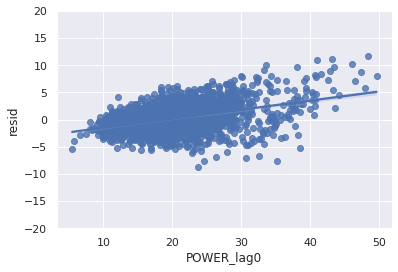

In [ ]:
# Residual and Q plot for months (NOV to March) 
NOVtoMARCH = F[(F["month"]== 1)| (F["month"]== 2)|(F["month"]== 3)|(F["month"]== 11)|(F["month"]== 12)]
sns.set_theme(color_codes=True)
sns.regplot(x="POWER_lag0", y="resid", data=NOVtoMARCH)
plt.ylim(-20, 20)

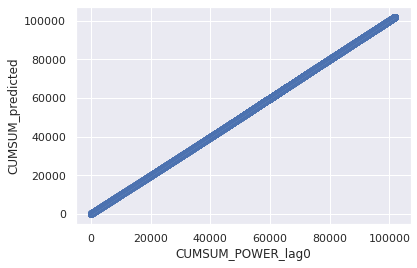

In [ ]:
# Q-Q plot (power) X: cumulative sum of the dataset  Y: Cumulated sum of the predicted
sns.set_theme(color_codes=True)
sns.regplot(x="CUMSUM_POWER_lag0", y="CUMSUM_predicted", data=F)


(0.5, 1.5)

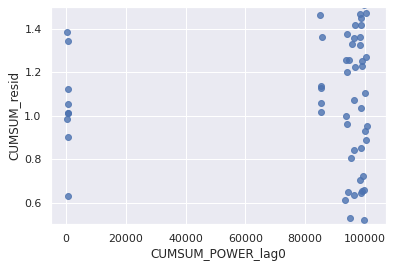

In [ ]:
# Q-Q plot (power) X: cumulative sum of the dataset  Y: cumulative sum of residual 
sns.set_theme(color_codes=True)
sns.regplot(x="CUMSUM_POWER_lag0", y="CUMSUM_resid", data=F)
plt.ylim(0.5, 1.5)



(0.5, 1.5)

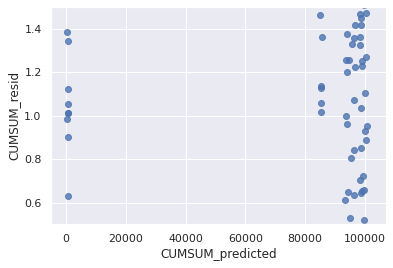

In [ ]:
# Q-Q plot (power) X: cumulative sum of the predicted  Y: cumulative sum of residual 
sns.set_theme(color_codes=True)
sns.regplot(x="CUMSUM_predicted", y="CUMSUM_resid", data=F)
plt.ylim(0.5, 1.5)


In [ ]:
# Convert the excel file into Dataframe
import io 
dm = pd.read_excel(io.BytesIO(uploaded['calendar Data .xlsx']))
#In the "Bank Holidays" column we replace the NaN value with zeros.
dm['Bank Holidays'] = dm['Bank Holidays'].fillna(0)

KeyboardInterrupt: ignored

In [ ]:
lagged4 = pd.concat([F['resid'].shift(lag).rename('{}_lag{}'.format(F['resid'].name, lag)) for lag in range(5)], axis=1)
# we convert the integers to float using astype fuction  and drop the the nan values usiing dropna function.
L4=lagged4.dropna().astype(float)
L4

,resid_lag0,resid_lag1,resid_lag2,resid_lag3,resid_lag4
28,-0.078694,0.216266,0.401517,-0.473560,0.252928
29,-1.260543,-0.078694,0.216266,0.401517,-0.473560
30,1.027406,-1.260543,-0.078694,0.216266,0.401517
31,-1.230550,1.027406,-1.260543,-0.078694,0.216266
32,-1.194546,-1.230550,1.027406,-1.260543,-0.078694
...,...,...,...,...,...
8755,-1.249369,-0.653167,2.939206,2.059488,-1.087994
8756,-1.760771,-1.249369,-0.653167,2.939206,2.059488
8757,2.860704,-1.760771,-1.249369,-0.653167,2.939206
8758,-2.660257,2.860704,-1.760771,-1.249369,-0.653167


In [ ]:
result5 = pd.concat([dm,L4], axis=1, join='inner')
result5

,Hour_day,Tuesday 0h,Tuesday 1h,Tuesday 2h,Tuesday 3h,Tuesday 4h,Tuesday 5h,Tuesday 6h,Tuesday 7h,Tuesday 8h,...,Monday 20h,Monday 21h,Monday 22h,Monday 23h,Bank Holidays,resid_lag0,resid_lag1,resid_lag2,resid_lag3,resid_lag4
28,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-0.078694,0.216266,0.401517,-0.473560,0.252928
29,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-1.260543,-0.078694,0.216266,0.401517,-0.473560
30,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.027406,-1.260543,-0.078694,0.216266,0.401517
31,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-1.230550,1.027406,-1.260543,-0.078694,0.216266
32,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-1.194546,-1.230550,1.027406,-1.260543,-0.078694
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-1.249369,-0.653167,2.939206,2.059488,-1.087994
8756,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-1.760771,-1.249369,-0.653167,2.939206,2.059488
8757,21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.860704,-1.760771,-1.249369,-0.653167,2.939206
8758,22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-2.660257,2.860704,-1.760771,-1.249369,-0.653167


In [ ]:
result6 = pd.concat([result5,L2], axis=1, join='inner')
result6

In [ ]:
result7 = pd.concat([result6,L3], axis=1, join='inner')
r7=result7.dropna()
r7

,Hour_day,Tuesday 0h,Tuesday 1h,Tuesday 2h,Tuesday 3h,Tuesday 4h,Tuesday 5h,Tuesday 6h,Tuesday 7h,Tuesday 8h,...,Irradiation.flux_lag15,Irradiation.flux_lag16,Irradiation.flux_lag17,Irradiation.flux_lag18,Irradiation.flux_lag19,Irradiation.flux_lag20,Irradiation.flux_lag21,Irradiation.flux_lag22,Irradiation.flux_lag23,Irradiation.flux_lag24
28,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,43.2,40.0,28.4,22.7,8.8,4.7,4.4,4.7,5.1,4.9
29,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,15.7,43.2,40.0,28.4,22.7,8.8,4.7,4.4,4.7,5.1
30,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.7,15.7,43.2,40.0,28.4,22.7,8.8,4.7,4.4,4.7
31,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.8,5.7,15.7,43.2,40.0,28.4,22.7,8.8,4.7,4.4
32,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.9,2.8,5.7,15.7,43.2,40.0,28.4,22.7,8.8,4.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.9,3.8,3.7,3.4,4.4,3.6,4.4,5.2,4.8,4.6
8756,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.8,3.9,3.8,3.7,3.4,4.4,3.6,4.4,5.2,4.8
8757,21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.9,3.8,3.9,3.8,3.7,3.4,4.4,3.6,4.4,5.2
8758,22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.8,3.9,3.8,3.9,3.8,3.7,3.4,4.4,3.6,4.4


In [ ]:
import pandas as pd
import statsmodels.api as sm
X1 = r7[['resid_lag1','resid_lag2','resid_lag3','resid_lag4','resid_lag5','resid_lag6','resid_lag7','resid_lag8','resid_lag9','resid_lag10','resid_lag11','resid_lag12']] 
Y1 = r7['resid_lag0']

KeyError: ignored

In [ ]:
# we fit our model using statmodels library 
regr = linear_model.LinearRegression()
regr.fit(X1, Y1)

LinearRegression()

In [ ]:
# with statsmodels we display a comprehensive table with statistical informations.
X1 = sm.add_constant(X1) # adding a constant
 
model = sm.OLS(Y1, X1).fit()
predictions = model.predict(X1) 
print_model = model.summary()
print(print_model)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


                            OLS Regression Results                            
Dep. Variable:             resid_lag1   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.026
Method:                 Least Squares   F-statistic:                   0.04362
Date:                Fri, 03 Jun 2022   Prob (F-statistic):               1.00
Time:                        11:26:38   Log-Likelihood:                -17806.
No. Observations:                8400   AIC:                         3.606e+04
Df Residuals:                    8177   BIC:                         3.763e+04
Df Model:                         222                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
F1=r7.rename(columns={'Tuesday 0h':'Tuesday_0h','Tuesday 1h':'Tuesday_1h','Tuesday 2h':'Tuesday_2h','Tuesday 3h':'Tuesday_3h','Tuesday 4h':'Tuesday_4h','Tuesday 5h':'Tuesday_5h','Tuesday 6h':'Tuesday_6h','Tuesday 7h':'Tuesday_7h','Tuesday 8h':'Tuesday_8h','Tuesday 9h':'Tuesday_9h','Tuesday 10h':'Tuesday_10h','Tuesday 11h':'Tuesday_11h','Tuesday 12h':'Tuesday_12h','Tuesday 13h':'Tuesday_13h','Tuesday 14h':'Tuesday_14h',
'Tuesday 15h':'Tuesday_15h','Tuesday 16h':'Tuesday_16h','Tuesday 17h':'Tuesday_17h','Tuesday 18h':'Tuesday_18h','Tuesday 19h':'Tuesday_19h','Tuesday 20h':'Tuesday_20h','Tuesday 21h':'Tuesday_21h','Tuesday 22h':'Tuesday_22h','Tuesday 23h':'Tuesday_23h','Wednesday 0h':'Wednesday_0h','Wednesday 1h':'Wednesday_1h','Wednesday 2h':'Wednesday_2h','Wednesday 3h':'Wednesday_3h','Wednesday 4h':'Wednesday_4h','Wednesday 5h':'Wednesday_5h','Wednesday 6h':'Wednesday_6h','Wednesday 7h':'Wednesday_7h','Wednesday 8h':'Wednesday_8h','Wednesday 9h':'Wednesday_9h','Wednesday 10h':'Wednesday_10h','Wednesday 11h':'Wednesday_11h','Wednesday 12h':'Wednesday_12h','Wednesday 13h':'Wednesday_13h','Wednesday 14h':'Wednesday_14h',
'Wednesday 15h':'Wednesday_15h','Wednesday 16h':'Wednesday_16h','Wednesday 17h':'Wednesday_17h','Wednesday 18h':'Wednesday_18h','Wednesday 19h':'Wednesday_19h','Wednesday 20h':'Wednesday_20h','Wednesday 21h':'Wednesday_21h','Wednesday 22h':'Wednesday_22h','Wednesday 23h':'Wednesday_23h','Thursday 0h':'Thursday_0h','Thursday 1h':'Thursday_1h','Thursday 2h':'Thursday_2h','Thursday 3h':'Thursday_3h','Thursday 4h':'Thursday_4h','Thursday 5h':'Thursday_5h','Thursday 6h':'Thursday_6h','Thursday 7h':'Thursday_7h','Thursday 8h':'Thursday_8h','Thursday 9h':'Thursday_9h','Thursday 10h':'Thursday_10h','Thursday 11h':'Thursday_11h','Thursday 12h':'Thursday_12h','Thursday 13h':'Thursday_13h','Thursday 14h':'Thursday_14h',
'Thursday 15h':'Thursday_15h','Thursday 16h':'Thursday_16h','Thursday 17h':'Thursday_17h','Thursday 18h':'Thursday_18h','Thursday 19h':'Thursday_19h','Thursday 20h':'Thursday_20h','Thursday 21h':'Thursday_21h','Thursday 22h':'Thursday_22h','Thursday 23h':'Thursday_23h','Friday 0h':'Friday_0h','Friday 1h':'Friday_1h','Friday 2h':'Friday_2h','Friday 3h':'Friday_3h','Friday 4h':'Friday_4h','Friday 5h':'Friday_5h','Friday 6h':'Friday_6h','Friday 7h':'Friday_7h','Friday 8h':'Friday_8h','Friday 9h':'Friday_9h','Friday 10h':'Friday_10h','Friday 11h':'Friday_11h','Friday 12h':'Friday_12h','Friday 13h':'Friday_13h','Friday 14h':'Friday_14h',
'Friday 15h':'Friday_15h','Friday 16h':'Friday_16h','Friday 17h':'Friday_17h','Friday 18h':'Friday_18h','Friday 19h':'Friday_19h','Friday 20h':'Friday_20h','Friday 21h':'Friday_21h','Friday 22h':'Friday_22h','Friday 23h':'Friday_23h','Saturday 0h':'Saturday_0h','Saturday 1h':'Saturday_1h','Saturday 2h':'Saturday_2h','Saturday 3h':'Saturday_3h','Saturday 4h':'Saturday_4h','Saturday 5h':'Saturday_5h','Saturday 6h':'Saturday_6h','Saturday 7h':'Saturday_7h','Saturday 8h':'Saturday_8h','Saturday 9h':'Saturday_9h','Saturday 10h':'Saturday_10h','Saturday 11h':'Saturday_11h','Saturday 12h':'Saturday_12h','Saturday 13h':'Saturday_13h','Saturday 14h':'Saturday_14h',
'Saturday 15h':'Saturday_15h','Saturday 16h':'Saturday_16h','Saturday 17h':'Saturday_17h','Saturday 18h':'Saturday_18h','Saturday 19h':'Saturday_19h','Saturday 20h':'Saturday_20h','Saturday 21h':'Saturday_21h','Saturday 22h':'Saturday_22h','Saturday 23h':'Saturday_23h','Sunday 0h':'Sunday_0h','Sunday 1h':'Sunday_1h','Sunday 2h':'Sunday_2h','Sunday 3h':'Sunday_3h','Sunday 4h':'Sunday_4h','Sunday 5h':'Sunday_5h','Sunday 6h':'Sunday_6h','Sunday 7h':'Sunday_7h','Sunday 8h':'Sunday_8h','Sunday 9h':'Sunday_9h','Sunday 10h':'Sunday_10h','Sunday 11h':'Sunday_11h','Sunday 12h':'Sunday_12h','Sunday 13h':'Sunday_13h','Sunday 14h':'Sunday_14h',
'Sunday 15h':'Sunday_15h','Sunday 16h':'Sunday_16h','Sunday 17h':'Sunday_17h','Sunday 18h':'Sunday_18h','Sunday 19h':'Sunday_19h','Sunday 20h':'Sunday_20h','Sunday 21h':'Sunday_21h','Sunday 22h':'Sunday_22h','Sunday 23h':'Sunday_23h','Monday 0h':'Monday_0h','Monday 1h':'Monday_1h','Monday 2h':'Monday_2h','Monday 3h':'Monday_3h','Monday 4h':'Monday_4h','Monday 5h':'Monday_5h','Monday 6h':'Monday_6h','Monday 7h':'Monday_7h','Monday 8h':'Monday_8h','Monday 9h':'Monday_9h','Monday 10h':'Monday_10h','Monday 11h':'Monday_11h','Monday 12h':'Monday_12h','Monday 13h':'Monday_13h','Monday 14h':'Monday_14h',
'Monday 15h':'Monday_15h','Monday 16h':'Monday_16h','Monday 17h':'Monday_17h','Monday 18h':'Monday_18h','Monday 19h':'Monday_19h','Monday 20h':'Monday_20h','Monday 21h':'Monday_21h','Monday 22h':'Monday_22h','Monday 23h':'Monday_23h','Irradiation.flux_lag0':'Irradiation_flux_lag0','Irradiation.flux_lag1':'Irradiation_flux_lag1','Irradiation.flux_lag2':'Irradiation_flux_lag2','Irradiation.flux_lag3':'Irradiation_flux_lag3','Irradiation.flux_lag4':'Irradiation_flux_lag4','Irradiation.flux_lag5':'Irradiation_flux_lag5','Irradiation.flux_lag6':'Irradiation_flux_lag6','Irradiation.flux_lag7':'Irradiation_flux_lag7','Irradiation.flux_lag8':'Irradiation_flux_lag8','Irradiation.flux_lag9':'Irradiation_flux_lag9','Irradiation.flux_lag10':'Irradiation_flux_lag10',
'Irradiation.flux_lag11':'Irradiation_flux_lag11','Irradiation.flux_lag12':'Irradiation_flux_lag12','Irradiation.flux_lag13':'Irradiation_flux_lag13','Irradiation.flux_lag14':'Irradiation_flux_lag14','Irradiation.flux_lag15':'Irradiation_flux_lag15','Irradiation.flux_lag16':'Irradiation_flux_lag16','Irradiation.flux_lag17':'Irradiation_flux_lag17','Irradiation.flux_lag18':'Irradiation_flux_lag18','Irradiation.flux_lag19':'Irradiation_flux_lag19','Irradiation.flux_lag20':'Irradiation_flux_lag20','Irradiation.flux_lag21':'Irradiation_flux_lag21','Irradiation.flux_lag22':'Irradiation_flux_lag22','Irradiation.flux_lag23':'Irradiation_flux_lag23','Irradiation.flux_lag24':'Irradiation_flux_lag24','Bank Holidays':'Bank_Holidays'})

KJB = smf.ols('resid_lag0 ~ Temperature_lag0 + Temperature_lag1 + Temperature_lag2 + Temperature_lag3 + Temperature_lag4 + Temperature_lag5 + Temperature_lag6 + Temperature_lag7 + Temperature_lag8 + Temperature_lag9 + Temperature_lag10 + Temperature_lag11 + Temperature_lag12 + Temperature_lag13 + Temperature_lag14 + Temperature_lag15 + Temperature_lag16 + Temperature_lag17 + Temperature_lag18 + Temperature_lag19 + Temperature_lag20 + Temperature_lag21 + Temperature_lag22 + Temperature_lag23 + Temperature_lag24 + Irradiation_flux_lag0 + Irradiation_flux_lag1 + Irradiation_flux_lag2 + Irradiation_flux_lag3 + Irradiation_flux_lag4 + Irradiation_flux_lag5 + Irradiation_flux_lag6 + Irradiation_flux_lag7 + Irradiation_flux_lag8 + Irradiation_flux_lag9 + Irradiation_flux_lag10 + Irradiation_flux_lag11 + Irradiation_flux_lag12 + Irradiation_flux_lag13 + Irradiation_flux_lag14 + Irradiation_flux_lag15 + Irradiation_flux_lag16 + Irradiation_flux_lag17 + Irradiation_flux_lag18 + Irradiation_flux_lag19 + Irradiation_flux_lag20 + Irradiation_flux_lag21 + Irradiation_flux_lag22 + Irradiation_flux_lag23 + Irradiation_flux_lag24 + Tuesday_0h + Tuesday_1h + Tuesday_2h + Tuesday_3h + Tuesday_4h + Tuesday_5h + Tuesday_6h + Tuesday_7h + Tuesday_8h + Tuesday_9h + Tuesday_10h + Tuesday_11h + Tuesday_12h + Tuesday_13h + Tuesday_14h + Tuesday_15h + Tuesday_16h + Tuesday_17h + Tuesday_18h + Tuesday_19h + Tuesday_20h + Tuesday_21h + Tuesday_22h + Tuesday_23h + Wednesday_0h + Wednesday_1h + Wednesday_2h + Wednesday_3h + Wednesday_4h + Wednesday_5h + Wednesday_6h + Wednesday_7h + Wednesday_8h + Wednesday_9h + Wednesday_10h + Wednesday_11h + Wednesday_12h + Wednesday_13h + Wednesday_14h + Wednesday_15h + Wednesday_16h + Wednesday_17h + Wednesday_18h + Wednesday_19h + Wednesday_20h + Wednesday_21h + Wednesday_22h + Wednesday_23h + Thursday_0h + Thursday_1h + Thursday_2h + Thursday_3h + Thursday_4h + Thursday_5h + Thursday_6h + Thursday_7h + Thursday_8h + Thursday_9h + Thursday_10h + Thursday_11h + Thursday_12h + Thursday_13h + Thursday_14h + Thursday_15h + Thursday_16h + Thursday_17h + Thursday_18h + Thursday_19h + Thursday_20h + Thursday_21h + Thursday_22h + Thursday_23h + Friday_0h + Friday_1h + Friday_2h + Friday_3h + Friday_4h + Friday_5h + Friday_6h + Friday_7h + Friday_8h + Friday_9h + Friday_10h + Friday_11h + Friday_12h + Friday_13h + Friday_14h + Friday_15h + Friday_16h + Friday_17h + Friday_18h + Friday_19h + Friday_20h + Friday_21h + Friday_22h + Friday_23h + Saturday_0h + Saturday_1h + Saturday_2h + Saturday_3h + Saturday_4h + Saturday_5h + Saturday_6h + Saturday_7h + Saturday_8h + Saturday_9h + Saturday_10h + Saturday_11h + Saturday_12h + Saturday_13h + Saturday_14h + Saturday_15h + Saturday_16h + Saturday_17h + Saturday_18h + Saturday_19h + Saturday_20h + Saturday_21h + Saturday_22h + Saturday_23h + Sunday_0h + Sunday_1h + Sunday_2h + Sunday_3h + Sunday_4h + Sunday_5h + Sunday_6h + Sunday_7h + Sunday_8h + Sunday_9h + Sunday_10h + Sunday_11h + Sunday_12h + Sunday_13h + Sunday_14h + Sunday_15h + Sunday_16h + Sunday_17h + Sunday_18h + Sunday_19h + Sunday_20h + Sunday_21h + Sunday_22h + Sunday_23h + Monday_0h + Monday_1h + Monday_2h + Monday_3h + Monday_4h + Monday_5h + Monday_6h + Monday_7h + Monday_8h + Monday_9h + Monday_10h + Monday_11h + Monday_12h + Monday_13h + Monday_14h + Monday_15h + Monday_16h + Monday_17h + Monday_18h + Monday_19h + Monday_20h + Monday_21h + Monday_22h + Monday_23h + Bank_Holidays + resid_lag1 + resid_lag2 + resid_lag3 + resid_lag4',F1).fit()
F1['predicted'] = KJB.fittedvalues
F1['resid'] = KJB.resid
F1['predicted'] = KJB.predict(F1)
F1.loc[:,'predicted'] =  KJB.predict(F1)
F1

,Hour_day,Tuesday_0h,Tuesday_1h,Tuesday_2h,Tuesday_3h,Tuesday_4h,Tuesday_5h,Tuesday_6h,Tuesday_7h,Tuesday_8h,...,Irradiation_flux_lag17,Irradiation_flux_lag18,Irradiation_flux_lag19,Irradiation_flux_lag20,Irradiation_flux_lag21,Irradiation_flux_lag22,Irradiation_flux_lag23,Irradiation_flux_lag24,predicted,resid
28,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,28.4,22.7,8.8,4.7,4.4,4.7,5.1,4.9,-0.000846,-0.077848
29,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,40.0,28.4,22.7,8.8,4.7,4.4,4.7,5.1,0.000747,-1.261289
30,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,43.2,40.0,28.4,22.7,8.8,4.7,4.4,4.7,-0.001123,1.028529
31,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,15.7,43.2,40.0,28.4,22.7,8.8,4.7,4.4,0.001496,-1.232046
32,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.7,15.7,43.2,40.0,28.4,22.7,8.8,4.7,0.008434,-1.202979
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.7,3.4,4.4,3.6,4.4,5.2,4.8,4.6,-0.016181,-1.233189
8756,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.8,3.7,3.4,4.4,3.6,4.4,5.2,4.8,-0.030553,-1.730218
8757,21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.9,3.8,3.7,3.4,4.4,3.6,4.4,5.2,-0.008267,2.868971
8758,22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.8,3.9,3.8,3.7,3.4,4.4,3.6,4.4,0.016170,-2.676428


In [ ]:
# We add one column with cumulative sum oF1 the predicted value (our model )and another column F1or the dataset . 
F1['CUMSUM_predicted'] = F1['predicted'].cumsum()
F1['CUMSUM_resid_lag0'] = F1['resid_lag0'].cumsum()
# We add another column with cumlative sum F1or the residual value 
F1['CUMSUM_resid'] = F1['resid'].cumsum()
F1

,Hour_day,Tuesday_0h,Tuesday_1h,Tuesday_2h,Tuesday_3h,Tuesday_4h,Tuesday_5h,Tuesday_6h,Tuesday_7h,Tuesday_8h,...,Irradiation_flux_lag20,Irradiation_flux_lag21,Irradiation_flux_lag22,Irradiation_flux_lag23,Irradiation_flux_lag24,predicted,resid,CUMSUM_predicted,CUMSUM_resid_lag0,CUMSUM_resid
28,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.7,4.4,4.7,5.1,4.9,-0.000846,-0.077848,-0.000846,-0.078694,-7.784804e-02
29,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,8.8,4.7,4.4,4.7,5.1,0.000747,-1.261289,-0.000100,-1.339237,-1.339137e+00
30,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,22.7,8.8,4.7,4.4,4.7,-0.001123,1.028529,-0.001223,-0.311831,-3.106084e-01
31,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,28.4,22.7,8.8,4.7,4.4,0.001496,-1.232046,0.000274,-1.542380,-1.542654e+00
32,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,40.0,28.4,22.7,8.8,4.7,0.008434,-1.202979,0.008707,-2.736926,-2.745633e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.6,4.4,5.2,4.8,4.6,-0.016181,-1.233189,-0.392178,-2.002831,-1.610653e+00
8756,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.4,3.6,4.4,5.2,4.8,-0.030553,-1.730218,-0.422731,-3.763602,-3.340871e+00
8757,21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.4,4.4,3.6,4.4,5.2,-0.008267,2.868971,-0.430998,-0.902898,-4.719004e-01
8758,22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.7,3.4,4.4,3.6,4.4,0.016170,-2.676428,-0.414828,-3.563156,-3.148328e+00


In [ ]:
#We evaluate the regression model using the mean absolute error metric 
#We import the mean_absolute_error from the module sklearn.metrics of sklearn library.
from sklearn.metrics import mean_absolute_error as mae
# we calculate  mean absolute error (MAE) 
error = mae(F1['resid_lag0'], F1['predicted'])
# We print the value 
print("Mean absolute error : " + str(error))

Mean absolute error : 1.5012090051394207
